In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import requests
import json
from pandas import json_normalize
from IPython.display import HTML
%matplotlib inline

pd.options.display.precision = 15
pd.options.display.max_rows = 500

import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import requests
import time, random

import re
import gensim
from gensim.models import CoherenceModel

In [2]:
#read in data
df1 = pd.read_excel('jobs_uae_AD.xlsx')
df2 = pd.read_excel('jobs_uae_dubai.xlsx')
frames = [df1,df2]
df = pd.concat(frames)
corpus = df['summary']
corpus.shape

(739,)

In [4]:
df.head(5)


,Unnamed: 0,title,location,company,summary,salary,Unnamed: 6,url
0,0,FEMALE Physiotherapist PT,Abu Dhabi,Private healthcare facility,Willing to work 48 hours per week.Able to join...,"AED8,500 a month",NaN,NaN
1,1,Senior Operations Officer (UAE Nationals Only ...,Abu Dhabi,MDC Business Management Services,"\*Preferred - Healthcare and others (airline, ...","AED30,000 - AED35,000 a month",NaN,NaN
2,2,ICU General Practitioner/General Physicians J1...,UAE,Prospect Healthcare,We are currently working alongside our partner...,NaN,NaN,NaN
3,3,General Practitioner,Ruwais,Mubadala,Communicate using appropriate terminology for ...,NaN,NaN,NaN
4,4,Store Keeper (Healthcare),Abu Dhabi,Baniyas Medical Center,Healthcare Experience is a Must!!!We are looki...,"AED3,000 a month",NaN,NaN


In [5]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

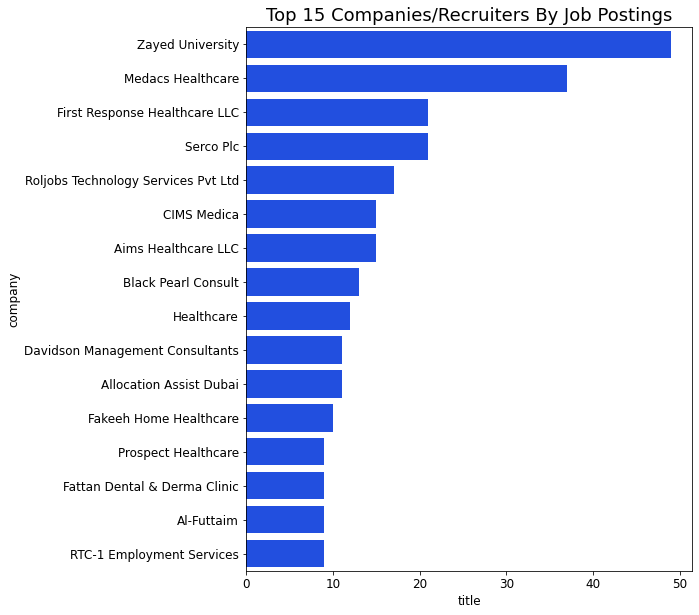

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df.groupby('company').count().sort_values(by='title', ascending=False).reset_index()[['company', 'title']].copy()

# Plot the total crashes
sns.set_color_codes("bright")
sns.barplot(x="title", y="company", data=rec_df.loc[0:15,:],
            label="Total", color="b")

plt.title('Top 15 Companies/Recruiters By Job Postings', fontsize=18);

In [8]:
#Set to lower case so capitalised titles don't get counted separately
df['title'] = df['title'].apply(lambda x: x.lower())

#Group by Role to investigate different types
df_grp = df.groupby('title').count().reset_index().sort_values(by='company', ascending=False)[['title', 'company']]

print("Number of unique job roles:", df_grp.shape[0])

print("Number of titles used more than once:", df_grp[df_grp.company > 1].shape[0])

df_grp[df_grp.company > 2]

Number of unique job roles: 580
Number of titles used more than once: 45


,title,company
440,registered nurse,28
389,patient relationship executive at aims healthc...,12
201,female home care nurse / caregiver,12
223,general practitioner,11
576,western pediatric oncologist,11
391,pcr swab nurse - dha licensed 6000-8000 aed,11
512,specialist dermatologist,10
267,home health care - rn,10
413,practical nurse,6
264,home care nurse,5


In [20]:
searchfor = ['operations','management','manager','financial','finance','policy','economics',
             'supply chain', 'modeling','simulation','engineering','risk','quality management',
             'six sigma','information systems', 'analyst', 'technology']
print("Number of relevant roles containing keywords:",  df[df['title'].str.contains('|'.join(searchfor))].shape[0])
dfrel = df[df['title'].str.contains('|'.join(searchfor))]
df[df['title'].str.contains('|'.join(searchfor))]


Number of relevant roles containing keywords: 100


,Unnamed: 0,title,location,company,summary,salary,Unnamed: 6,url,Role_Type
1,1,senior operations officer (uae nationals only ...,Abu Dhabi,MDC Business Management Services,"\*Preferred - Healthcare and others (airline, ...","AED30,000 - AED35,000 a month",NaN,NaN,senior
8,8,"finance director, finance controller ( healthc...",Abu Dhabi,ASCO Holdings,"Is responsible for the financial.Assessments, ...",NaN,NaN,NaN,regular
19,19,regional sales manager,Abu Dhabi,Boehringer Ingelheim,We develop breakthrough therapies and innovati...,NaN,NaN,NaN,regular
33,39,business analyst,Abu Dhabi,McKinsey & Company,We encourage you to explore different content ...,NaN,NaN,NaN,regular
34,41,business operations associate,Abu Dhabi,Nathan & Nathan,"Planning, monitoring, preparing and presenting...",NaN,NaN,NaN,regular
39,48,knowledge analyst - it/gem/banking/healthcare ...,Abu Dhabi,McKinsey & Company,Engineering degree from a Tier 1 university;MB...,NaN,NaN,NaN,regular
46,55,chief financial officer,Abu Dhabi,BuildConsult International,"Capital Markets, Private Equity, Real Estate, ...",NaN,NaN,NaN,lead
47,56,restaurant manager,Abu Dhabi,Excelsior Group,The client offers services that include but ar...,"AED10,000 - AED15,000 a month",NaN,NaN,regular
49,58,project manager (healthcare),Abu Dhabi,HAYS,Project Manager to lead implementation and sup...,NaN,NaN,NaN,regular
58,67,project manager,Abu Dhabi,Zayed University,The University’s benefits package is highly at...,NaN,NaN,NaN,regular


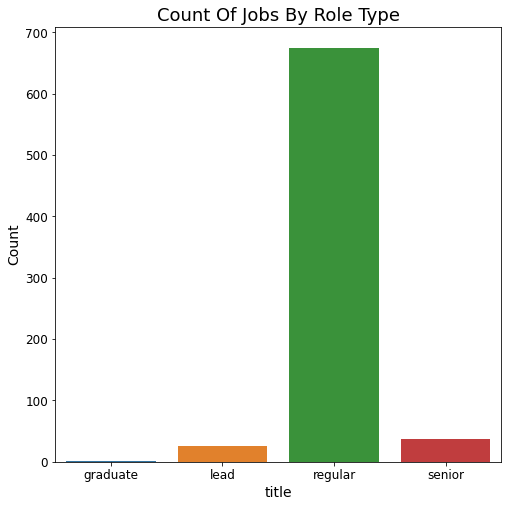

In [18]:
# Function to return the type of role based on keywords in the title.
def role_type(x):
    if 'lead' in x:
        return 'lead'
    elif 'head' in x:
        return 'lead'
    elif 'chief' in x:
        return 'lead'
    elif 'senior' in x:
        return 'senior'
    elif 'graduate' in x:
        return 'graduate'
    else:
        return 'regular'
    
df['Role_Type'] = df['title'].apply(role_type)

job_df = df.groupby('Role_Type').count().reset_index()[['Role_Type', 'title']]

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='Role_Type', y='title', data=job_df)

ax.set_title('Count Of Jobs By Role Type', fontsize=18)
ax.set_xlabel('title', fontsize=14)
ax.set_ylabel('Count', fontsize=14);

In [30]:
auth_endpoint = "https://auth.emsicloud.com/connect/token" # auth endpoint

client_id = "k3qyefj275x2i813" # replace 'your_client_id' with your client id from your api invite email
client_secret = "VtX86jAr" # replace 'your_client_secret' with your client secret from your api invite email
scope = "emsi_open" # ok to leave as is, this is the scope we will used

payload = "client_id=" + client_id + "&client_secret=" + client_secret + "&grant_type=client_credentials&scope=" + scope # set credentials and scope
headers = {'content-type': 'application/x-www-form-urlencoded'} # headers for the response
access_token = json.loads((requests.request("POST", auth_endpoint, data=payload, headers=headers)).text)['access_token'] # grabs request's text and loads as JSON, then pulls the access token from that


In [31]:
def extract_skills_list():
  all_skills_endpoint = "https://emsiservices.com/skills/versions/latest/skills" # List of all skills endpoint
  auth = "Authorization: Bearer " + access_token # Auth string including access token from above
  headers = {'authorization': auth} # headers
  response = requests.request("GET", all_skills_endpoint, headers=headers) # response
  response = response.json()['data'] # the data

  all_skills_df = pd.DataFrame(json_normalize(response)); # Where response is a JSON object drilled down to the level of 'data' key
  return all_skills_df

extract_skills_list()

,id,infoUrl,name,type.id,type.name
0,KS120P86XDXZJT3B7KVJ,https://skills.emsidata.com/skills/KS120P86XDX...,(American Society For Quality) ASQ Certified,ST3,Certification
1,KS126XS6CQCFGC3NG79X,https://skills.emsidata.com/skills/KS126XS6CQC...,.NET Assemblies,ST1,Hard Skill
2,KS1200B62W5ZF38RJ7TD,https://skills.emsidata.com/skills/KS1200B62W5...,.NET Framework,ST1,Hard Skill
3,KS126XW78QJCF4TRV2X7,https://skills.emsidata.com/skills/KS126XW78QJ...,.NET Framework 1,ST1,Hard Skill
4,KS126XY68BNKXSBSLPYS,https://skills.emsidata.com/skills/KS126XY68BN...,.NET Framework 3,ST1,Hard Skill
...,...,...,...,...,...
30503,ESCD425835A01B0C6EE7,https://skills.emsidata.com/skills/ESCD425835A...,pH Meters,ST1,Hard Skill
30504,KSQ1NQ6HNQ0PZ8J8FY0R,https://skills.emsidata.com/skills/KSQ1NQ6HNQ0...,phpBB,ST1,Hard Skill
30505,ESB5778D0DE341B0FBD2,https://skills.emsidata.com/skills/ESB5778D0DE...,qTest,ST1,Hard Skill
30506,KS440T963CCSV4W7BWJ5,https://skills.emsidata.com/skills/KS440T963CC...,spatialNET,ST1,Hard Skill


In [32]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

In [33]:
corpus = df1['summary']
str1 = listToString(corpus)
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__, str1))
answer

'Willing to work  hours per weekAble to join by April or May With Drivers license or willing to take the driving licenseUp to AED per monthPreferred  Healthcare and others airline hospitality industry or sector within UAE onlyReporting to the Operations Manager the Senior OperationsWe are currently working alongside our partner in the United Arab Emiratesassisting them in their search forGeneral Practitioners  General Physicians GPsCommunicate using appropriate terminology for the guest their families and other healthcare professionalsProvides expert and appropriate medical services andHealthcare Experience is a MustWe are looking for a Storekeeper for a Medical Center in Abu DhabiUp to AED per monthHealthcare Assistant Abu Dhabi Functions to performTo provide a range of healthcare and nonnursing duties ensuring an efficient and effective service toThe Universitys benefits package is highly attractive with competitive salaries free of tax in the UAE Cash housing a furniture allowance a

In [34]:
# Extract skills from a document
def extract_skills_from_document():
  skills_from_doc_endpoint = "https://emsiservices.com/skills/versions/latest/extract"
  text = answer
  payload = "{ \"text\": \"... " + text + " ...\", \"confidenceThreshold\": " + "0.6" + " }"

  headers = {
      'authorization': "Bearer " + access_token,
      'content-type': "application/json"
      }

  response = requests.request("POST", skills_from_doc_endpoint, data=payload.encode('utf-8'), headers=headers)

  skills_found_in_document_df = pd.DataFrame(json_normalize(response.json()['data'])); # Where response is a JSON object drilled down to the level of 'data' key
                                            
  return skills_found_in_document_df
  
extract_skills_from_document()

,confidence,skill.id,skill.infoUrl,skill.name,skill.tags,skill.type.id,skill.type.name
0,1.000000000000000,KS122556LMQ829GZCCRV,https://skills.emsidata.com/skills/KS122556LMQ...,Communications,"[{'key': 'wikipediaExtract', 'value': 'Communi...",ST2,Soft Skill
1,1.000000000000000,KS1203Q5Z029L6G5T9SD,https://skills.emsidata.com/skills/KS1203Q5Z02...,Physical Therapy,"[{'key': 'wikipediaExtract', 'value': 'Physica...",ST1,Hard Skill
2,1.000000000000000,KS128006L3V0HM2B26N5,https://skills.emsidata.com/skills/KS128006L3V...,Predictive Modeling,"[{'key': 'wikipediaExtract', 'value': 'Predict...",ST1,Hard Skill
3,1.000000000000000,KS1227V6WBR3BH3SJYSZ,https://skills.emsidata.com/skills/KS1227V6WBR...,Information Technology,"[{'key': 'wikipediaExtract', 'value': 'Informa...",ST2,Soft Skill
4,1.000000000000000,ES1C82EE0BE1AD440DAD,https://skills.emsidata.com/skills/ES1C82EE0BE...,Art Education,"[{'key': 'wikipediaExtract', 'value': 'Visual ...",ST1,Hard Skill
5,1.000000000000000,KSKG9OA3NDST6929VROF,https://skills.emsidata.com/skills/KSKG9OA3NDS...,Quality Control,"[{'key': 'wikipediaExtract', 'value': 'Quality...",ST1,Hard Skill
6,1.000000000000000,KS1270B6ZM2TMYPKYRH1,https://skills.emsidata.com/skills/KS1270B6ZM2...,Neurology,"[{'key': 'wikipediaExtract', 'value': 'Neurolo...",ST1,Hard Skill
7,1.000000000000000,KS440V76TYZ2914W661H,https://skills.emsidata.com/skills/KS440V76TYZ...,Speech-Language Pathology,"[{'key': 'wikipediaExtract', 'value': 'Speech-...",ST1,Hard Skill
8,1.000000000000000,ESEB1D4619E6E83A061D,https://skills.emsidata.com/skills/ESEB1D4619E...,Planning,"[{'key': 'wikipediaExtract', 'value': 'Plannin...",ST2,Soft Skill
9,1.000000000000000,KSWR4RCZQM7RAQNUFC40,https://skills.emsidata.com/skills/KSWR4RCZQM7...,Data Pipeline,"[{'key': 'wikipediaExtract', 'value': 'In comp...",ST1,Hard Skill


In [35]:
corpus1 = df['summary']
str2 = listToString(corpus1)
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer1 = ''.join(filter(whitelist.__contains__, str1))
answer1

'Willing to work  hours per weekAble to join by April or May With Drivers license or willing to take the driving licenseUp to AED per monthPreferred  Healthcare and others airline hospitality industry or sector within UAE onlyReporting to the Operations Manager the Senior OperationsWe are currently working alongside our partner in the United Arab Emiratesassisting them in their search forGeneral Practitioners  General Physicians GPsCommunicate using appropriate terminology for the guest their families and other healthcare professionalsProvides expert and appropriate medical services andHealthcare Experience is a MustWe are looking for a Storekeeper for a Medical Center in Abu DhabiUp to AED per monthHealthcare Assistant Abu Dhabi Functions to performTo provide a range of healthcare and nonnursing duties ensuring an efficient and effective service toThe Universitys benefits package is highly attractive with competitive salaries free of tax in the UAE Cash housing a furniture allowance a

In [36]:
# Extract skills from a document
def extract_skills_from_document():
  skills_from_doc_endpoint = "https://emsiservices.com/skills/versions/latest/extract"
  text = answer1
  payload = "{ \"text\": \"... " + text + " ...\", \"confidenceThreshold\": " + "0.7" + " }"

  headers = {
      'authorization': "Bearer " + access_token,
      'content-type': "application/json"
      }

  response = requests.request("POST", skills_from_doc_endpoint, data=payload.encode('utf-8'), headers=headers)

  skills_found_in_document_df = pd.DataFrame(json_normalize(response.json()['data'])); # Where response is a JSON object drilled down to the level of 'data' key
                                            
  return skills_found_in_document_df
  
extract_skills_from_document()

,confidence,skill.id,skill.infoUrl,skill.name,skill.tags,skill.type.id,skill.type.name
0,1.000000000000000,KS122556LMQ829GZCCRV,https://skills.emsidata.com/skills/KS122556LMQ...,Communications,"[{'key': 'wikipediaExtract', 'value': 'Communi...",ST2,Soft Skill
1,1.000000000000000,KS1203Q5Z029L6G5T9SD,https://skills.emsidata.com/skills/KS1203Q5Z02...,Physical Therapy,"[{'key': 'wikipediaExtract', 'value': 'Physica...",ST1,Hard Skill
2,1.000000000000000,KS128006L3V0HM2B26N5,https://skills.emsidata.com/skills/KS128006L3V...,Predictive Modeling,"[{'key': 'wikipediaExtract', 'value': 'Predict...",ST1,Hard Skill
3,1.000000000000000,KS1227V6WBR3BH3SJYSZ,https://skills.emsidata.com/skills/KS1227V6WBR...,Information Technology,"[{'key': 'wikipediaExtract', 'value': 'Informa...",ST2,Soft Skill
4,1.000000000000000,ES1C82EE0BE1AD440DAD,https://skills.emsidata.com/skills/ES1C82EE0BE...,Art Education,"[{'key': 'wikipediaExtract', 'value': 'Visual ...",ST1,Hard Skill
5,1.000000000000000,KSKG9OA3NDST6929VROF,https://skills.emsidata.com/skills/KSKG9OA3NDS...,Quality Control,"[{'key': 'wikipediaExtract', 'value': 'Quality...",ST1,Hard Skill
6,1.000000000000000,KS1270B6ZM2TMYPKYRH1,https://skills.emsidata.com/skills/KS1270B6ZM2...,Neurology,"[{'key': 'wikipediaExtract', 'value': 'Neurolo...",ST1,Hard Skill
7,1.000000000000000,KS440V76TYZ2914W661H,https://skills.emsidata.com/skills/KS440V76TYZ...,Speech-Language Pathology,"[{'key': 'wikipediaExtract', 'value': 'Speech-...",ST1,Hard Skill
8,1.000000000000000,ESEB1D4619E6E83A061D,https://skills.emsidata.com/skills/ESEB1D4619E...,Planning,"[{'key': 'wikipediaExtract', 'value': 'Plannin...",ST2,Soft Skill
9,1.000000000000000,KSWR4RCZQM7RAQNUFC40,https://skills.emsidata.com/skills/KSWR4RCZQM7...,Data Pipeline,"[{'key': 'wikipediaExtract', 'value': 'In comp...",ST1,Hard Skill
